<h1>Assignment 4</h1>
<h4>Student: Daniel Gil</h4>
<h4>ID: 905923</h4>

<h3>Problem 1</h3>

Let $Y_i, \ i = 1,...,k$ independent $X_2(r_i)$ random variables. We have already studied that $\sum_iY_i$ is also $\chi^2$ with degrees of freedom equal to  $\sum_ir_i$. Unfortunately, the distribution of $\sum_ia_iY_i$ where the $a_i$s are known constants is in general quite difficult to obtain. In this problem, you will use the method of moments to find a constant ν such that if $Y = \sum_{i=1}^k a_iY_i$, then
<br/>
$\frac{Y}{E(Y)} \sim \frac{\chi^2(v)}{v} $, approximately

<b>a) </b>First try to match first moments. Recall that $E[\chi^2(ν)] = ν$ and explain why the first moment equation is not useful here.

The the  first theoretical moment:
$E(\frac{\chi^2(v)}{v} )=\frac{E(\chi^2(v))}{v}=1 $



The first moment in the left side $\frac{Y}{E(Y)}$, is given by $E(\frac{Y}{E(Y)})$. 

As explained, the first moment for  $\frac{Y}{E(Y)}$ is:

$E(\frac{Y}{E(Y)} ) = \frac{1}{E(Y)}\times E(\sum(a_iy_i))$, since $E(Y)$ is a number<br/>
then, the first moment can be expanded as:
$\frac{1}{E(Y)}\times E(a_iy_i + a_2y_2+...+a_ky_k)$<br/>
which does not have the term $\nu$.


We can see from the ecuations that the term $\nu$ is not present, therefore the first moment will not help us to find the value of $\nu$. 

<b>b)</b>Consider the following “customized” method of moments. Show that

$Var(\frac{\nu Y}{E(Y)})=\frac{2\nu^2}{(E(Y))^2}\sum_{i=1}^k(a_iE(Y_i))^2/r_i$

<img src="res/1_b.png">

<d>c)Finally, replace the variance on the left with the variance of the approximating chi-square random variable and replace the expectations on the right with the observed values of the random variables (this is the ’ ’customized method” of moments step). Show that the resulting equation for $\nu$ has the following solution:</d>

$\check{\nu}=\frac{(\sum_{i=1}^ka_iY_i)^2}{\sum_{i=1}^k\frac{a_i^2}{r_i}Y_i^2}$

<img src="res/1_c.png">

<d>d)Test the Satterthwaite approximation by Monte Carlo simulations in R: <i>(i)</i> generate $B = 1000$ samples from $Y_1 + 2Y_2$, with $Y_1 \sim \chi^2(2)$ and $Y_2 \sim \chi^2(4)$; <i>(ii)</i>generate another B = 1000 samples from the corresponding Satterhwaite distribution, $\chi^2(\nu)/\nu$, as described in (c);  <i>(iii)</i> give a QQ plot comparing the distribution of the two random samples and briefly comment on the quality of the Satterth- waite approximation</d>

<b><i>(i)</i></b>

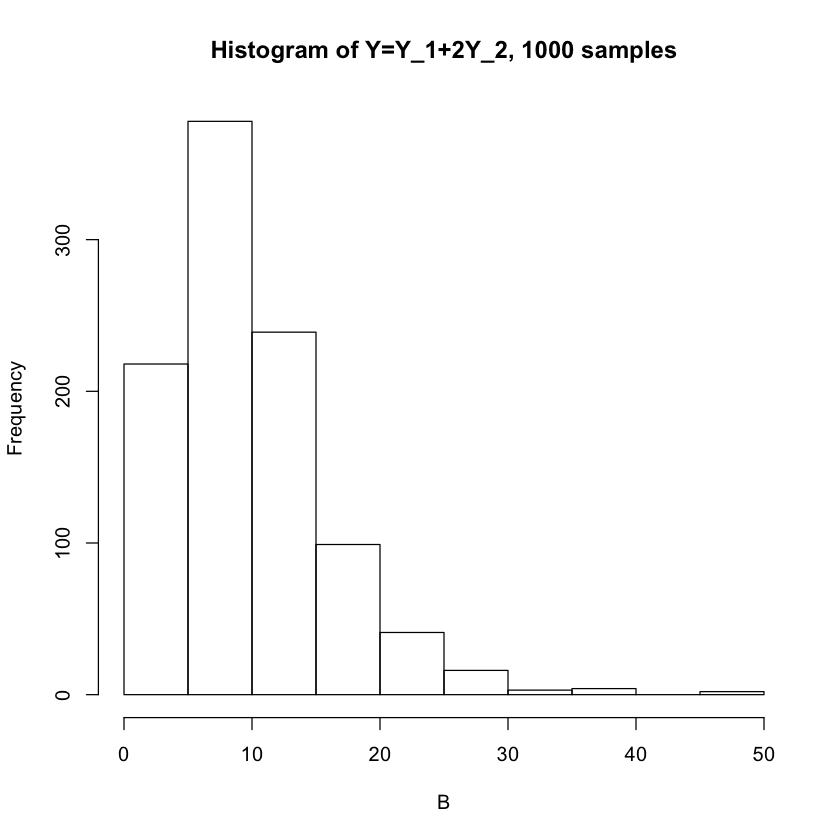

In [8]:
# default parameters
a1=1
a2=2
r1=2
r2=4
samples=1000

# generate random samples for two chi-square r.v. 
y1=rchisq(n =samples,df=r1)
y2=rchisq(n=samples, df=r2)

# generate B
B=a1*y1+a2*y2
hist(B,main='Histogram of Y=Y_1+2Y_2, 1000 samples')

<b><i>(ii)</i></b>

In [9]:
# generate vector of random probability points
rprobs=ppoints(samples)

# calculate v according with (c)
vhat=((a1*y1+a2*y2)^2)/((a1^2*y1^2)/r1+(a2^2*y2^2)/r2)

# obtain theoretical quantiles - sample of 1000 Satterhwaite distribution
tq=qchisq(rprobs,df=vhat)/vhat
length(tq)

[1] 1000

<b><i>(ii)</i></b>

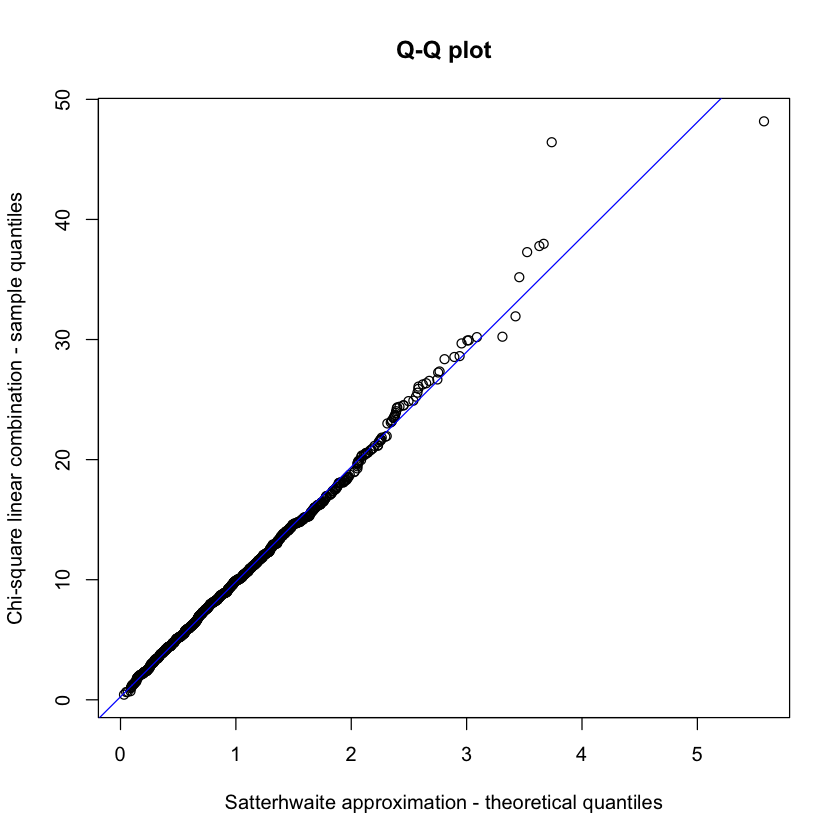

In [14]:
# plot
qqplot(tq,sort(B),main='Q-Q plot',xlab = 'Satterhwaite approximation - theoretical quantiles',ylab='Chi-square linear combination - sample quantiles')
qqline(sort(B),distribution=function(p)qchisq(p,df=vhat)/vhat,probs=c(0.25,0.75),col='blue')

Q-Q plot shows that the Satterhwaite is a good approximation for a linear combination of $\chi^2$, however, for higher values the fit is not that good.

In [132]:
# other way to calculate using plot instead of qqplot
#shw=rchisq(n=samples,df=vhat)/vhat
#Z=sort(B)
#qshw=quantile(shw,probs = ppoints(samples))
#plot(qshw,Z,main='Q-Q plot', xlab='approx',ylab = 'Linear comb')
#fit=lm(Z ~ qshw)
#abline(fit,col=4)

<h3>Problem 2</h3>

Samples of Roman pottery were taken at two sites in Britain. At the first site, $14$ samples were analyzed and the average percentage of aluminium oxide was $\bar{x} = 12.56$ with sample variance $s^2_x = 24.65$. At the second site $5$ samples were analyzed and the average percentage of aluminium oxide was $\bar{y} = 17.32$ with sample variance $s^2_y = 11.01$. You may assume the samples are from normally distributed populations and that the variances of the two populations are the same.

<b>a)</b>Is there sufficient evidence to justify claiming that a difference exists in the mean percentages of aluminium oxide for the two sites? Use $\alpha = 0.05$ and clearly state your null and alternate hypotheses.

Let $X$ be the percentage of aluminium oxide in site 1, and $Y$ be the percentage of aluminium oxide in site 2.<br/>
$X \sim N(\mu_x,\sigma^2)$, <br/> 
$Y \sim N(\mu_y,\sigma^2)$, <br/> 
$\sigma_x^2 = \sigma_y^2=\sigma^2$<br/>
$n=$number of samples of site $1$<br/>
$m=$number of samples of site $2$<br/>

$H_0: \mu_x=\mu_y$<br/>
$H_1: \mu_x \neq \mu_y$<br/>


Since $\sigma$ is unknown and the same for $X \ and \ Y$, we can use the statistic T evaluate the hypothesis: <br/>
$T=\frac{\bar{X}-\bar{Y}-(\mu_x-\mu_y)}{S_p \sqrt{1/n+1/m}} \sim t_{n+m-2}$

where, </br>
$S_p=\sqrt{\frac{(n-1)S_x^2 + (m-1)S^2_y}{n+m-2}}$, is the pooled estimate of the common variance


In [133]:
n=14
m=5
x_bar=12.56
s2_x=24.65
y_bar=17.32
s2_y=11.01
s_p=sqrt(((n-1)*s2_x + (m-1)*s2_y)/(n+m-2))
print(s_p)

[1] 4.630398


In the statistic:

In [134]:
t=(x_bar-y_bar)/(s_p*sqrt(1/n+1/m))
print(t)

[1] -1.973153


since $\alpha=0.05$ and we are interested in find if 
$|t|> t_{\alpha/2}$
where $|t|=1.973153$

In [135]:
t_a_2=-qt(0.025,df=17)
print(t_a_2)

[1] 2.109816


since |t| is greater than $t_{\alpha/2}$ and less than - $t_{\alpha/2}$ we fail to reject $H_o$ as there is not sufficient evidence to justify claiming that a difference exists in the mean percentages of aluminium oxide for the two sites

<b>b)</b> Find p-value

In [136]:
2*pt(1.97, 17, lower.tail = FALSE)

[1] 0.06535208

<b>c)</b>Give a 95% confidence interval for the mean difference in the percentage of aluminium oxide between the two sites.

Since we have $\sigma$ similar but unknown we can use t statistic:

$\bar{X}-\bar{Y} \pm t_0S_p\sqrt(1/n+1/m)$<br/>
$\bar{X}-\bar{Y} \pm (2.1098)(4.630)\sqrt(1/14+1/5)$<br/>
$\bar{X}-\bar{Y} \pm 5.089644$

In [137]:
range=(2.1098)*(s_p)*sqrt(1/14+1/5)

print(x_bar-y_bar-range)
print(x_bar-y_bar+range)

[1] -9.849644
[1] 0.3296441


The $95\%$ confidence interval is $(-9.8496,0.3296)$

<h3>Problem 3</h3>

The article “Measuring the exposure of infants to tobacco smoke” in the New England Journal of Medicine reported a study in which measurements were taken on a sample of infants who had been exposed to tobacco smoke and another sample who had not. The following are the urinary concentrations of cotinine (a metabolite of nicotine).


Unexposed: 8 11 12 14 20 43 111 <br/>
Exposed: 35 56 83 92 128 150 176 208

<b>a)</b>Use the sign test to determine if there is evidence that the median cotinine concentration in exposed individuals is larger than $130$. Use $\alpha = 0.05$ and clearly state your hypotheses.

Let $X$ be the number of infants unexposed<br/>
Let $Y$ be the number of infants exposed

$H_0: m=130$<br/>
$H_1: m>130$

First, let's perfrom the sign test:

In [4]:
unexposed=c(8, 11, 12, 14, 20, 43, 111)
exposed=c(35, 56, 83, 92, 128, 150, 176, 208)
m=130
s=exposed-130
print (s)

[1] -95 -74 -47 -38  -2  20  46  78


Suppose $W$ is the number of positive signs, we want to reject $H_0$ if $W$ is too large, for a median>130 we should expect half of the observations.
If the number of negative signs is greater than $5$ then we have evidence to show the exposed individuals is larger than $130$<br/>
$P(w> 3)= 1 - P(w \leq 2)$


In [5]:
p_w=1-pbinom(2,8,0.5)
print(p_w)

[1] 0.8554688


the probability $0.85$ is not less than our critical region 0.05 so we fail to reject $H_0$ as there is not enough evidence that the median level of concentrations is greater than $130$.

<b>b)</b>Use the two sample Wilcoxon test to determine if these data indicate the median cotinine concentration is larger in exposed than unexposed infants. Use the normal approximation to the distribution of the test statistic, take α = 0.01 and clearly state your hypotheses.

$H_0: m_x=m_y$<br/>
$H1: m_x<m_y$<br/>
$\alpha=0.01$<br/>
Let $W$ be the sum of the ranks.

Sorting the data in a combined sample we have:<br/>
$
8(X)\
11(X)\
12(X)\
14(X)\
20(X)\
35(Y)\
43(X)\
56(Y)\
83(Y)\
92(Y)\
111(X)\
128(Y)\
150(Y)\
176(Y)\
208(Y)\
$

the ranks for $Y$ are $6,8,9,10,12,13,14,15$ </br>
Then,
$W=87$

We can perform the wilcox test, under the assumption data is large enough:

In [6]:
wtest=wilcox.test(exposed,unexposed,mu = 0,alternative = c('greater'),correct = FALSE)
wtest$method
data.frame(data=c(wtest$data.name),W=c(wtest$statistic),p.value=c(wtest$p.value),row.names=c(""))

[1] "Wilcoxon rank sum test"

,data,W,p.value
,exposed and unexposed,51,0.002952603


We can reject the $H_0$ and conclude at the 1% level of significance that the median of cotinne concentration is larger in exposed than unexposed infants.

Additionaly, assuming the data is large enough, we could use approximation with Central Limit Theorem to <br/>
$z=\frac{w-\mu_w}{\sigma_w} \sim N(0,1)$<br/>
$\mu_w = E(W)=\frac{n_2(n_1+n_2+1)}{2}=(8*16)/2=64$<br/>
$\sigma_w^2=n_1n_2(n_1+n_2+1)/12=7(8)(16)/12=74,67$<br/>


We can calculate a normal approximation.
$z=\frac{87-64}{74,67}=2.6617$

p value can be calculated:

In [141]:
1-pnorm((87-64)/sqrt(7*8*16/12))

[1] 0.003886978

Rejecting $H_0$ as shown previously.

<h3>Problem 4</h3>


The Hardy-Weinberg law in genetics says that the proportions of genotypes $AA$, $Aa$ and $aa$ are $\theta^2$, $2\theta(1 − \theta)$, and $(1 − \theta)^2$, respectively with $\theta$ ∈ [0, 1]. Suppose that in a sample of n observations from the population, we observe $x_1$ individuals of type $AA$, $x_2$ individuals of type $Aa$, and $x_3$ individuals of type $aa$.

<b>a)</b> Give the pmf of distribution of the counts X = (X_1,X_2,X_3) 

The joint pmf of $X=(X_1,X2,X3)$ and $\theta^2$, $2\theta(1-\theta)$, and $(1-\theta)^2$, $\theta$ is in $[0,1]$.<br/>
Let $X_1$ individuals of type $AA$, $X_2$ individuals of type $Aa$, and $X_3$ individuals of type $aa$ independent of each other, then:

$f(X_1=x_1,X_2=x_2,X_3=x_3;\theta) = \frac{n!}{x_1!x_2!x_3!}\theta^{2x_1}(2\theta(1-\theta))^{x_2}(1-\theta)^{2x_3}$

<b>b)</b> Show that the MLE is unbiased and compute its variance.

For the given $PMF$:<br/>
$f(x_1,x_2,x_3;\theta)={\frac{2n!}{x_1!x_2!x_3}}\theta^{2x_1+x_2}(1-\theta)^{x_2+2x_3$}$<br/>
The likelihood function can be written as:<br/>
$L(f(x_1,x_2,x_3;\theta))=Ln(\frac{n!}{x_1!x_2!x_3!})+(2x_1+x_2)Ln(\theta)+(x_2+2x_3)Ln(1-\theta)$

let $s(\theta)=L(f(x_1,x_2,x_3;\theta))$<br/> then,<br/>

$s'(\theta)=\frac{2x_1+x_2}{\theta}-\frac{x_2+2x_3}{1-\theta}$

Equating to $0$ and solve for $\theta$<br/>

$\frac{1-\theta}{\theta} = \frac{x_2+2x3}{2x_1+x_2}$, then $\theta=\frac{2x_1+x_2}{2(x_1+x_2+x_3)}$

Now, for the second derivative, $s''(\theta)=-\frac{2x_1+x_2}{\theta^2}+\frac{x_2+2x_3}{(1-\theta)^2}$, assuming is always negative, then we can conclude the maximum likelihood estimator is:<br/>
$\hat{\theta}=\frac{2x_1+x_2}{2(x_1+x_2+x_3)}$

<b>c)</b>Show that the MLE is unbiased and compute its variance.

MLE $\hat{\theta}$ is unbiased if $E(\hat{\theta})=\hat{\theta}$, then<br/>
$E(\hat{\theta})=E(\frac{2x_1+x_2}{2(x_1+x_2+x_3)})$, replacing $n=x_1+x_2+x_3$, then<br/>
$E(\hat{\theta})=\frac{1}{2n}E(2x_1+x_2)=\frac{1}{2n}(2E(x_1)+E(x_2))$.

Is given that<br/>
$E(X_j) = np_i,\ Var(X_j)=np_j(1−p_j) \ and\ Cov(X_j,X_j′)=−np_jp_j′ $<br/>
then,<br/>
$E(\hat{\theta})=\frac{1}{2n}2np_1+\frac{1}{2n}np_2$. using $p_1=\theta^2 \ and\ p_2=2\hat{\theta}(1-\hat{\theta})$, then<br/>
$E(\hat{\theta})=\hat{\theta}^2+\frac{2\\hat{\theta}(1-\hat{\theta})}{2}$, simplifying:<br/>
$E(\hat{\theta})=\hat{\theta}$

We can conclude $\hat{\theta}$ is an unbiased estimator.

Now, for variance:
$Var(\theta)=\frac{1}{4n^2}(Var(2x_1+x_2))$<br/>
$Var(\theta)=\frac{1}{4n^2}(4Var(x_1)+Var(x_2)+4Cov(x_1,x_2))$<br/>
$Var(\theta)=\frac{1}{4n^2}(4np_1(1-p_1)+np_2(1-p_2)+4(-n)p_1p_2)$<br/> where $p_1=\theta^2$ and $p_2=2\theta(1-\theta)$<br/>
$Var(\theta)=\frac{1}{4n^2}(4n\theta^2(1-\theta^2)+n2\theta(1-\theta)(1-2(\theta(1-\theta)))-4(n)2\theta(1-\theta)\theta^2)$<br/>

Calculations are executed in Mathematica:<br/>
<img src="res/4_c.png">

<b>d)</b> A group of researchers is interested in studying the association between genotype and body mass index (BMI) for a particular population. Patients are randomly sampled and divided in two groups (BMI > 25 and BMI ≤ 25), resulting in the following data: 

<img src="res/4_d_data.png">


Let $\theta_1$ and $\theta_2$ denote group specific parameters (for the $BMI \leq 25$ and $BMI \gt 25$
groups , respectively). Compute maximum likelihood estimates of $\theta_1$ and $\theta_2$, say
$\hat{\theta}$ and $\hat{\theta}$.

$\hat{\theta_1}=\frac{2x_1+x_2}{2(x_1+x_2+x_3)}=\frac{2(30)+246}{2(30+246+380)}=0.2332$<br/>
$\hat{\theta_2}=\frac{2x_1+x_2}{2(x_1+x_2+x_3)}=\frac{2(30)+230}{2(30+230+184)}=0.3265$<br/>

In [142]:
theta_1=(2*30+246)/(2*(30+246+380))
theta_2=(2*30+230)/(2*(30+230+184))
print(theta_1)
print(theta_2)

[1] 0.2332317
[1] 0.3265766


<b>e)</b> Derive an approximate $(1−\alpha)100\%$ confidence interval for $\theta_1 − \theta_2$. Is there enough
evidence in these data suggesting association between genotype and BMI at the
$95\%$ confidence level?

$P(-z_{alpha/2}\lt \frac{\hat{\theta_1}-\hat{\theta_2}-(\theta_1-\theta_2)}{\sqrt{\frac{\hat{\sigma_1^2}}{n_1} + \frac{\hat{\sigma_2^2}}{n_2}}} \lt z_{alpha/2})=0.95 $

In [143]:
n_1=30+246+380
n_2=30+230+184
var_theta_1=(theta_1-theta_1^2)/(2*n_1)
var_theta_2=(theta_2-theta_2^2)/(2*n_2)
sides=qnorm(0.025)*sqrt(var_theta_1/n_1+var_theta_2/n_2)
print(c(theta_1-theta_2+sides,theta_1-theta_2-sides))

[1] -0.09505979 -0.09162995


We have enough evidence, with 95% confidence interval that $\theta_1$ and $\theta_2$ are not equal, since $0$ is not included in the interval. Therefore, we can conclude with enough evidence that these data is suggesting association between genotype and BMI.

<b>f)</b>What other test could you apply to see if Groups 1 and 2 have the same proportions of genotypes? Conduct this test. Comment on possible reasons for any differences you observe.

We want to establish if for the two groups $g_1=(BMI\leq25)$ and $g_2=(BMI\gt25)$ have the same proportions of genotypes, then the hypothesis to consider are:<br/> 
$H_0: p_{g1} = p_{g2}$<br/>
$H_1: p_{g1} \ne p_{g2}$<br/>

In this scenario, we actually want to test if the distributions are the same for both groups, the the chi-square test will give a p-value to test our hypothesis:


In [25]:
g1 <- c(30, 246, 380)
g2 <- c(30, 230, 184) 
observed <- matrix(data=c(g1,g2), nrow=2,byrow = TRUE)
(c1 <- chisq.test(observed, correct = F))



	Pearson's Chi-squared test

data:  observed
X-squared = 28.865, df = 2, p-value = 5.395e-07


$p-value$ is less than the critical region chosen, we can reject the Null Hypothesis at the $5\%$ confidence level and conclude that the two groups have different distributions of proportions of genotypes.
Moreover, if we look carefully at the data, the genotype $aa$ describe a significant difference for each group, this could be the reason why the distributions are different.